# 다시 시작!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
import seaborn as sns

In [4]:
wines = pd.read_csv('./Data/wines_raw_data2.csv')

#### 와인의 인포메이션

In [5]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wine_image      2403 non-null   object 
 1   name            2403 non-null   object 
 2   compareFoods    2403 non-null   object 
 3   rating          2403 non-null   float64
 4   about_wine      2403 non-null   object 
 5   Winery          2403 non-null   object 
 6   Type            2403 non-null   object 
 7   Grape_Type      2403 non-null   object 
 8   Alcohol         2403 non-null   object 
 9   year            2403 non-null   int64  
 10  price           2403 non-null   object 
 11  bodyPercent     2403 non-null   object 
 12  Tanning         1777 non-null   object 
 13  Sugar           2403 non-null   object 
 14  Acidic          2403 non-null   object 
 15  NewBodyPercent  2403 non-null   float64
 16  NewTanning      1777 non-null   float64
 17  NewDryOrSweet   2403 non-null   f

In [6]:
wines

,wine_image,name,compareFoods,rating,about_wine,Winery,Type,Grape_Type,Alcohol,year,price,bodyPercent,Tanning,Sugar,Acidic,NewBodyPercent,NewTanning,NewDryOrSweet,NewAcidic,Region
0,https://images.vivino.com/thumbs/8a_JYJmsQ1q1P...,Château Beausejour (héritiers Duffau-Lagarross...,['https://images.vivino.com/backgrounds/foods/...,4.3,"[['Winery', 'Château Beausejour (héritiers Duf...",Château Beausejour (héritiers Duffau-Lagarrosse),red,"[' Merlot', ' Cabernet Sauvignon', ' Cabernet ...",13%,2014,$137.67,72.4694%;,56.8213%;,10.0319%;,53.3778%;,72.4694,56.8213,10.03190,53.3778,Bordeaux
1,https://images.vivino.com/thumbs/BrbHdEB8TqK2N...,Château La Conseillante\nPomerol 2018,['https://images.vivino.com/backgrounds/foods/...,4.3,"[['Winery', 'Château La Conseillante'], ['Grap...",Château La Conseillante,red,"[' 100% Cabernet Franc', ' ']",13.5%,2018,$343.99,71.1173%;,54.1515%;,9.05772%;,52.7759%;,71.1173,54.1515,9.05772,52.7759,Bordeaux
2,https://images.vivino.com/thumbs/4fTn5zJRTAWUd...,Château Gazin\nPomerol 2018,['https://images.vivino.com/backgrounds/foods/...,4.3,"[['Winery', 'Château Gazin'], ['Grapes', '100%...",Château Gazin,red,"[' 100% Merlot', ' ']",14.5%,2018,$139.99,73.0692%;,56.2655%;,8.95999%;,52.5401%;,73.0692,56.2655,8.95999,52.5401,Bordeaux
3,https://images.vivino.com/thumbs/9dJEcnU_RnecZ...,Château Gruaud Larose\nSaint-Julien (Grand Cru...,['https://images.vivino.com/backgrounds/foods/...,4.3,"[['Winery', 'Château Gruaud Larose'], ['Grapes...",Château Gruaud Larose,red,"[' 66% Cabernet Sauvignon', ' 28% Merlot', ' 6...",14%,2010,$189.95,61.9414%;,63.7522%;,7.8055%;,71.4182%;,61.9414,63.7522,7.80550,71.4182,Bordeaux
4,https://images.vivino.com/thumbs/auhSHa-oSo2t9...,Château Grand-Puy-Lacoste\nPauillac (Grand Cru...,['https://images.vivino.com/backgrounds/foods/...,4.3,"[['Winery', 'Château Grand-Puy-Lacoste'], ['Gr...",Château Grand-Puy-Lacoste,red,"[' 100% Cabernet Sauvignon', ' ']",13%,2019,$116,71.8223%;,72.767%;,7.55852%;,72.4042%;,71.8223,72.7670,7.55852,72.4042,Bordeaux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,https://images.vivino.com/thumbs/rJagmWexTo-3L...,Pierre Labet - François Labet\nMeursault 'Les ...,['https://images.vivino.com/backgrounds/foods/...,4.2,"[['Winery', 'Pierre Labet - François Labet'], ...",Pierre Labet - François Labet,white,"[' Chardonnay', ' ']",Contains sulfites,2018,$144,63.1348%;,NaN,2.90048%;,51.9795%;,63.1348,NaN,2.90048,51.9795,Bourgogne
2399,https://images.vivino.com/thumbs/jDBqD9qxSrel4...,Capuano-Ferreri\nChassagne-Montrachet 1er Cru ...,['https://images.vivino.com/backgrounds/foods/...,4.2,"[['Winery', 'Capuano-Ferreri'], ['Grapes', 'Ch...",Capuano-Ferreri,white,"[' Chardonnay', ' ']",Contains sulfites,2021,$112.88,54.7305%;,NaN,5.8355%;,50.5297%;,54.7305,NaN,5.83550,50.5297,Bourgogne
2400,https://images.vivino.com/thumbs/BOyk6qz0RRSsr...,Jean-Paul & Benoit Droin\nChablis Grand Cru 'V...,['https://images.vivino.com/backgrounds/foods/...,4.2,"[['Winery', 'Jean-Paul & Benoit Droin'], ['Gra...",Jean-Paul & Benoit Droin,white,"[' Chardonnay', ' ']",Contains sulfites,2022,$134,51.8453%;,NaN,10.91%;,68.8378%;,51.8453,NaN,10.91000,68.8378,Bourgogne
2401,https://images.vivino.com/thumbs/aztqJFYdSI2uL...,Louis Latour\nMeursault 1er Cru 'Les Gouttes d...,['https://images.vivino.com/backgrounds/foods/...,4.2,"[['Winery', 'Louis Latour'], ['Grapes', 'Chard...",Louis Latour,white,"[' Chardonnay', ' ']",Contains sulfites,2020,$177.15,60.1519%;,NaN,8.94333%;,42.0819%;,60.1519,NaN,8.94333,42.0819,Bourgogne


In [7]:
wines.shape

(2403, 20)

#### 와인의 타입은 레드와 화이트가 있음

In [8]:
wines.Type.unique()

array(['red', 'white'], dtype=object)

### 특정 칼럼을 key로 사용하여 다른 칼럼을 value로 넣는 함수

In [9]:
# key를 dic의 key로 사용하여 valueList의 value값을 list로 넣는 함수
def wines_dictionary_column(df, key, valueList):
    
    info = {}

    for i in range(len(df)):
        valueData = df[valueList].iloc[i]
        keyData = df[key].iloc[i]
        if not(keyData in info):
            info[keyData] = []
            
        info[keyData].append(valueData)

    return info

#### Red와 White의 당도를 Dictionary로 만들기

In [10]:
red_white_Sweetness_dic = wines_dictionary_column(df=wines, key='Type', valueList='NewDryOrSweet')

In [11]:
red_white_Sweetness_dic

{'red': [10.0319,
  9.05772,
  8.95999,
  7.8055,
  7.55852,
  7.08894,
  5.60577,
  2.8405,
  6.89993,
  5.41909,
  6.9153,
  9.8723,
  8.88689,
  8.09016,
  7.34484,
  6.55299,
  11.5048,
  9.22987,
  8.00563,
  7.61596,
  9.29886,
  12.9684,
  5.52759,
  8.14865,
  12.4486,
  2.47336,
  11.2899,
  5.27394,
  5.52759,
  4.60348,
  8.09016,
  6.69224,
  6.9153,
  8.33751,
  9.09325,
  7.21053,
  11.9082,
  8.6402,
  6.23646,
  9.31804,
  9.67683,
  11.9082,
  8.20886,
  7.40299,
  7.8055,
  9.20834,
  8.33751,
  9.22987,
  8.75301,
  7.40299,
  11.4079,
  9.8723,
  9.31804,
  8.03058,
  10.3597,
  10.706,
  7.52583,
  8.95999,
  6.23646,
  5.73907,
  9.22987,
  9.22987,
  7.61596,
  8.33751,
  7.40299,
  11.9082,
  8.23998,
  8.20886,
  9.13,
  4.64016,
  7.40299,
  9.73259,
  5.98581,
  9.12906,
  11.5048,
  2.8405,
  4.73132,
  9.36424,
  12.9684,
  9.2047,
  9.36495,
  7.33892,
  0.0,
  10.3714,
  5.08272,
  8.34621,
  6.84202,
  8.33751,
  7.42361,
  11.2345,
  9.81688,
  7.42361,

#### minmaxScaler를 사용하기 위해 2차원 array로 만들어줌

In [12]:
minmaxScaler = MinMaxScaler()

In [13]:
np.array(wines.NewDryOrSweet).reshape(-1,1)

array([[10.0319 ],
       [ 9.05772],
       [ 8.95999],
       ...,
       [10.91   ],
       [ 8.94333],
       [ 0.     ]])

#### TanningScale이라는 column을 만들어 당도의 스케일값을 넣어줌

In [14]:
wines['SweetnessScale'] = minmaxScaler.fit_transform(np.array(wines.NewDryOrSweet).reshape(-1,1))

#### 레드, 화이트로 나눈 dic을 minmax scaling함

In [15]:
red_sweetness_dic_scaler = minmaxScaler.fit_transform(np.array(red_white_Sweetness_dic['red']).reshape(-1,1))

In [16]:
white_sweetness_dic_scaler = minmaxScaler.fit_transform(np.array(red_white_Sweetness_dic['white']).reshape(-1,1))

#### 스케일링한 당도의 describe

In [17]:
wines['SweetnessScale'].describe()

count    2403.000000
mean        0.220466
std         0.136712
min         0.000000
25%         0.133593
50%         0.212820
75%         0.290271
max         1.000000
Name: SweetnessScale, dtype: float64

In [18]:
wines[wines['Type'] == 'red']['SweetnessScale'].describe()

count    1777.000000
mean        0.216097
std         0.120306
min         0.000000
25%         0.143752
50%         0.216320
75%         0.278289
max         0.714084
Name: SweetnessScale, dtype: float64

In [19]:
wines[wines['Type'] == 'white']['SweetnessScale'].describe()

count    626.000000
mean       0.232870
std        0.174624
min        0.000000
25%        0.100989
50%        0.208055
75%        0.341405
max        1.000000
Name: SweetnessScale, dtype: float64

> 레드와인과 화이트와인의 평균값은 비슷하나 분포에서 차이가 남

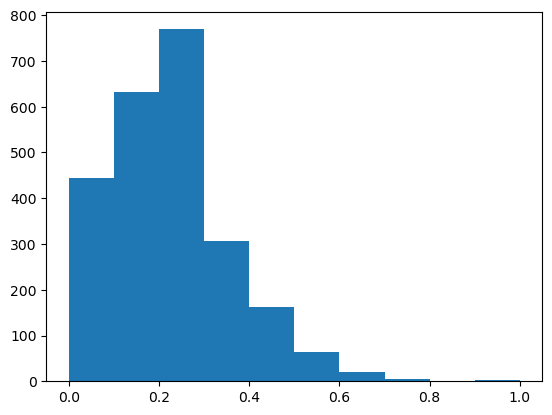

In [20]:
plt.hist(
    wines['SweetnessScale']
)

plt.show()

> 전체 와인의 당도는 0.2 ~ 0.4에 많이 분포하는 것을 확인

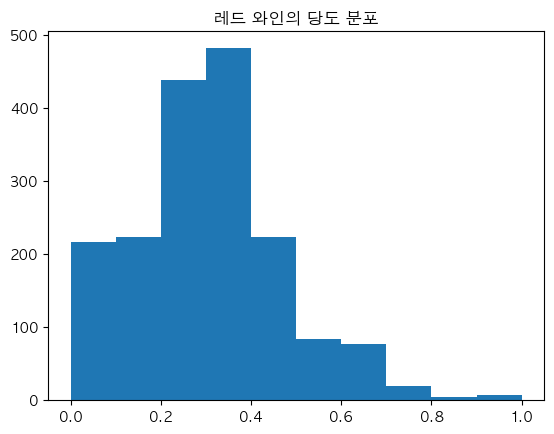

In [59]:
plt.hist(
    red_sweetness_dic_scaler
)

plt.title('레드 와인의 당도 분포')
plt.show()

> 레드와인의 당도는 0.2~0.4에 주로 분포 하는것을 확인

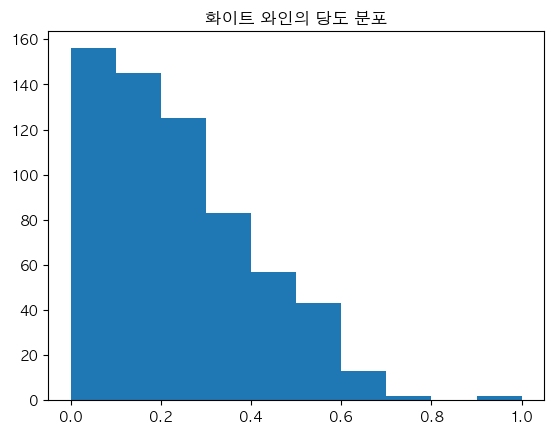

In [60]:
plt.hist(
    white_sweetness_dic_scaler
)

plt.title('화이트 와인의 당도 분포')
plt.show()

>화이트와인의 당도는 0.0~0.2에 주로 분포하는것을 확인

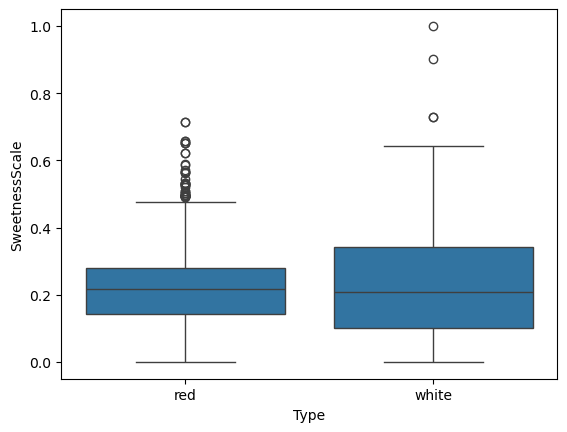

In [23]:
sns.boxplot(x="Type", y="SweetnessScale", data=wines)

plt.show()

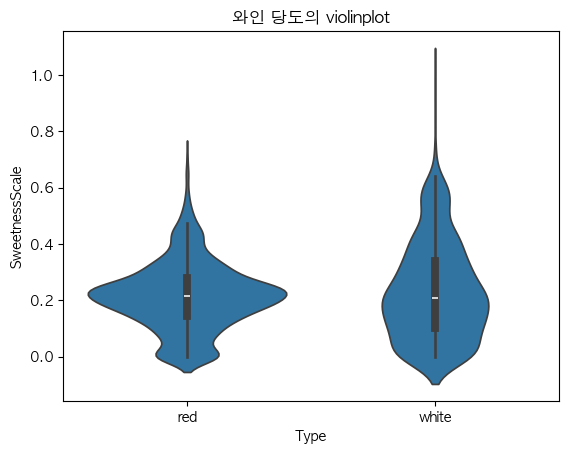

In [61]:
sns.violinplot(x="Type", y="SweetnessScale", data=wines)

plt.title('와인 당도의 violinplot')
plt.show()

> 레드와인은 당도의 특징이 두드러지게 나타남

In [25]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wine_image      2403 non-null   object 
 1   name            2403 non-null   object 
 2   compareFoods    2403 non-null   object 
 3   rating          2403 non-null   float64
 4   about_wine      2403 non-null   object 
 5   Winery          2403 non-null   object 
 6   Type            2403 non-null   object 
 7   Grape_Type      2403 non-null   object 
 8   Alcohol         2403 non-null   object 
 9   year            2403 non-null   int64  
 10  price           2403 non-null   object 
 11  bodyPercent     2403 non-null   object 
 12  Tanning         1777 non-null   object 
 13  Sugar           2403 non-null   object 
 14  Acidic          2403 non-null   object 
 15  NewBodyPercent  2403 non-null   float64
 16  NewTanning      1777 non-null   float64
 17  NewDryOrSweet   2403 non-null   f

In [26]:
red_white_Acidic_dic = wines_dictionary_column(df=wines, key='Type', valueList='NewAcidic')

In [27]:
wines['AcidicScale'] = minmaxScaler.fit_transform(np.array(wines.NewAcidic).reshape(-1,1))

In [28]:
red_Acidic_dic_scaler = minmaxScaler.fit_transform(np.array(red_white_Acidic_dic['red']).reshape(-1,1))

In [29]:
white_Acidic_dic_scaler = minmaxScaler.fit_transform(np.array(red_white_Acidic_dic['white']).reshape(-1,1))

In [30]:
wines['AcidicScale'].describe()

count    2403.000000
mean        0.627762
std         0.174978
min         0.000000
25%         0.491526
50%         0.680424
75%         0.788824
max         1.000000
Name: AcidicScale, dtype: float64

In [31]:
wines[wines['Type'] == 'red']['AcidicScale'].describe()

count    1777.000000
mean        0.686777
std         0.142871
min         0.311431
25%         0.562349
50%         0.729738
75%         0.801017
max         1.000000
Name: AcidicScale, dtype: float64

In [32]:
wines[wines['Type'] == 'white']['AcidicScale'].describe()

count    626.000000
mean       0.460238
std        0.147152
min        0.000000
25%        0.386124
50%        0.467103
75%        0.518825
max        0.826972
Name: AcidicScale, dtype: float64

> 화이트와인의 산도가 전체적으로 레드와인보다 낮은 것을 확인 가능

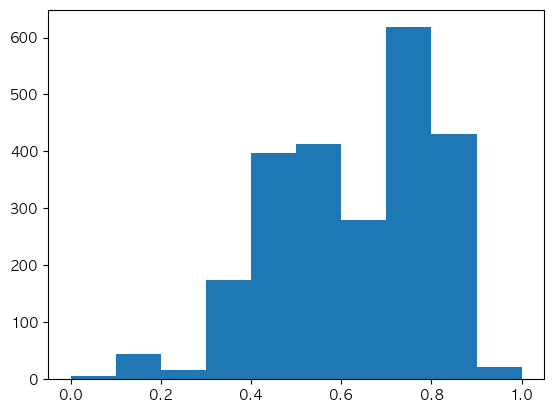

In [63]:
plt.hist(
    wines['AcidicScale']
)

plt.show()

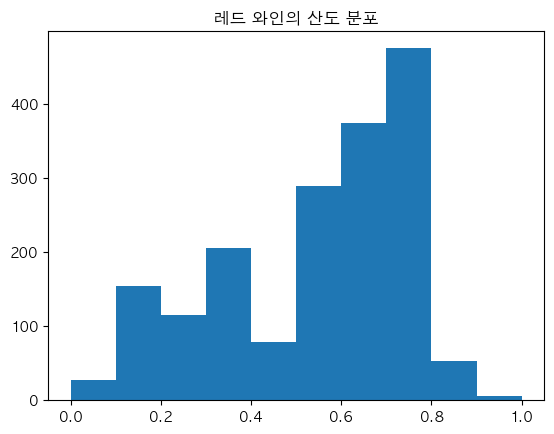

In [66]:
plt.hist(
    red_Acidic_dic_scaler
)

plt.title('레드 와인의 산도 분포')
plt.show()

> 레드와인의 산도는 0.7~0.8이 많은것을 확인 가능

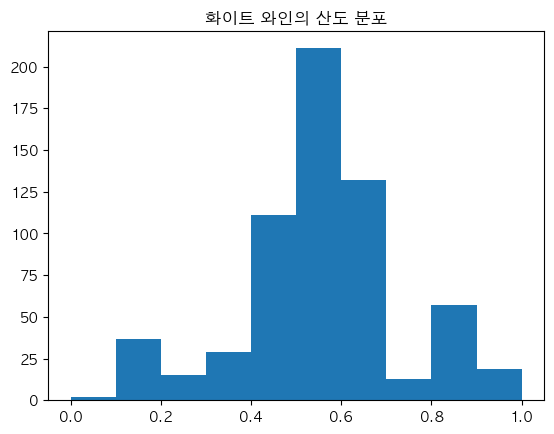

In [67]:
plt.hist(
    white_Acidic_dic_scaler
)

plt.title('화이트 와인의 산도 분포')
plt.show()

> 화이트와인의 산도는 0.5 부근이 많은것을 확인 가능

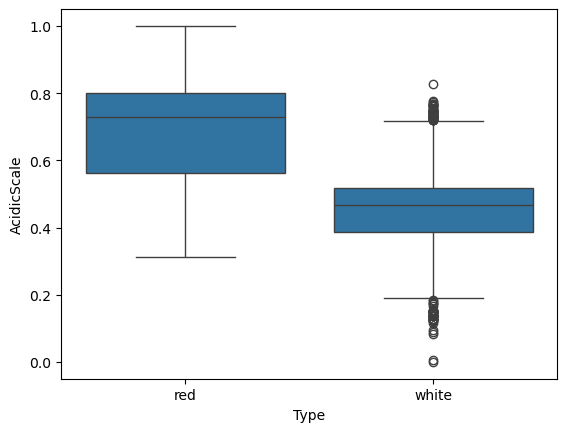

In [36]:
sns.boxplot(x="Type", y="AcidicScale", data=wines)

plt.show()

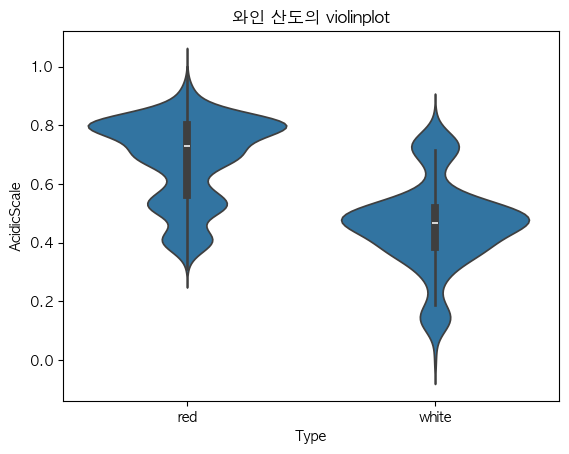

In [68]:
sns.violinplot(x="Type", y="AcidicScale", data=wines)

plt.title('와인 산도의 violinplot')
plt.show()

> 레드와인이 산도가 더 강한것을 확인 가능하며 왜도가 쎈 것으로 보아 레드와인은 특징이 두드러진다고 볼 수 있음

In [38]:
red_white_Body_dic = wines_dictionary_column(df=wines, key='Type', valueList='NewBodyPercent')

In [39]:
wines['BodyScale'] = minmaxScaler.fit_transform(np.array(wines.NewBodyPercent).reshape(-1,1))

In [40]:
red_Body_dic_scaler = minmaxScaler.fit_transform(np.array(red_white_Body_dic['red']).reshape(-1,1))

In [41]:
white_Body_dic_scaler = minmaxScaler.fit_transform(np.array(red_white_Body_dic['white']).reshape(-1,1))

In [42]:
wines['BodyScale'].describe()

count    2403.000000
mean        0.566627
std         0.244916
min         0.000000
25%         0.360208
50%         0.603293
75%         0.773303
max         1.000000
Name: BodyScale, dtype: float64

In [43]:
wines[wines['Type'] == 'red']['BodyScale'].describe()

count    1777.000000
mean        0.559826
std         0.273531
min         0.000000
25%         0.333117
50%         0.457441
75%         0.808640
max         1.000000
Name: BodyScale, dtype: float64

In [44]:
wines[wines['Type'] == 'white']['BodyScale'].describe()

count    626.000000
mean       0.585934
std        0.131978
min        0.172033
25%        0.528855
50%        0.625393
75%        0.670292
max        0.924730
Name: BodyScale, dtype: float64

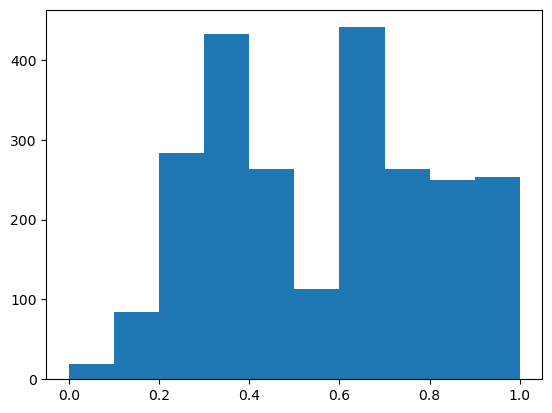

In [45]:
plt.hist(
    wines['BodyScale']
)

plt.show()

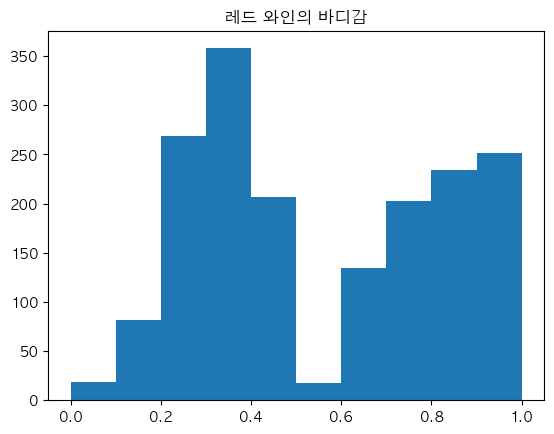

In [69]:
plt.hist(
    red_Body_dic_scaler
)

plt.title('레드 와인의 바디감')
plt.show()

> 0.6 부분만 비어있는 것을 확인 가능

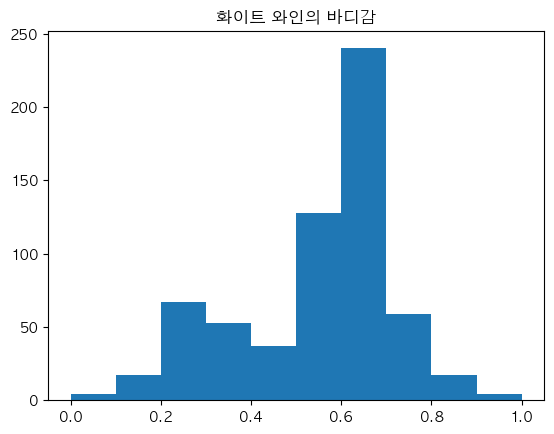

In [70]:
plt.hist(
    white_Body_dic_scaler
)

plt.title('화이트 와인의 바디감')
plt.show()

> 화이트와인의 바디감은 0.6~0.7에 몰려있음

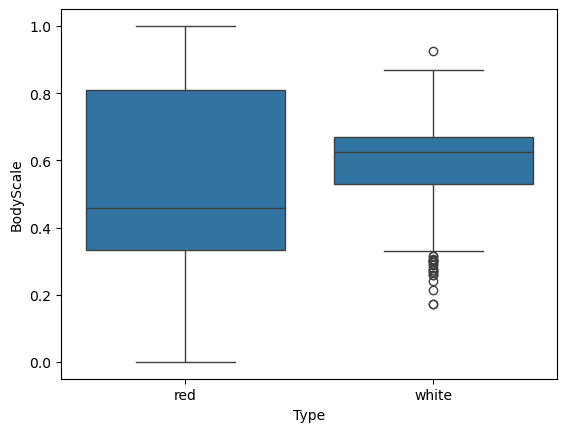

In [48]:
sns.boxplot(x="Type", y="BodyScale", data=wines)

plt.show()

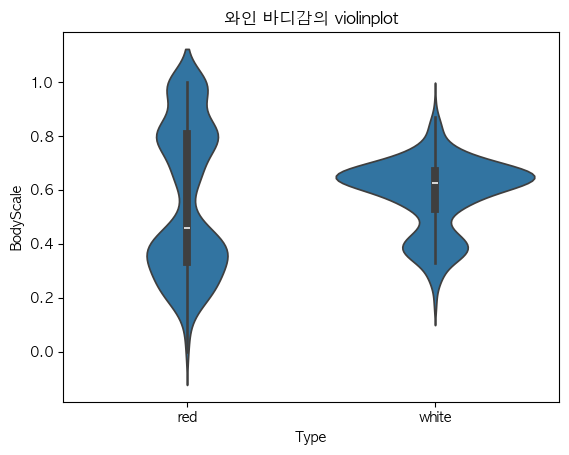

In [72]:
sns.violinplot(x="Type", y="BodyScale", data=wines)

plt.title('와인 바디감의 violinplot')
plt.show()

> 레드와인의 바디감은 특징이 두가지로 나눠지는 반면 화이트와인의 바디감은 특징이 뚜렷한 것을 확인 할 수 있음

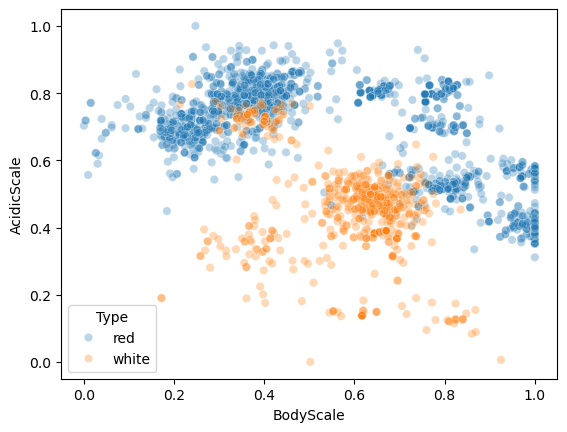

In [50]:
sns.scatterplot(
    x=wines.BodyScale,
    y=wines.AcidicScale,
    hue=wines.Type,
    alpha=0.3
)

plt.show()

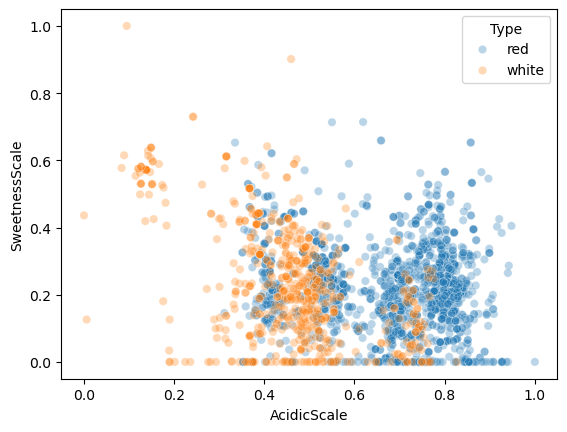

In [51]:
sns.scatterplot(
    x=wines.AcidicScale,
    y=wines.SweetnessScale,
    hue=wines.Type,
    alpha=0.3
)

plt.show()

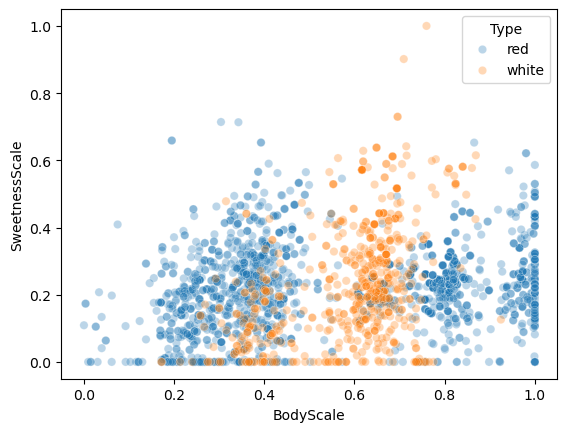

In [52]:
sns.scatterplot(
    x=wines.BodyScale,
    y=wines.SweetnessScale,
    hue=wines.Type,
    alpha=0.3
)

plt.show()

In [53]:
wines.to_csv('./Data/wines_feature_scale.csv', index_label=False)

In [54]:
wines = pd.read_csv('./Data/wines_feature_scale2.csv')

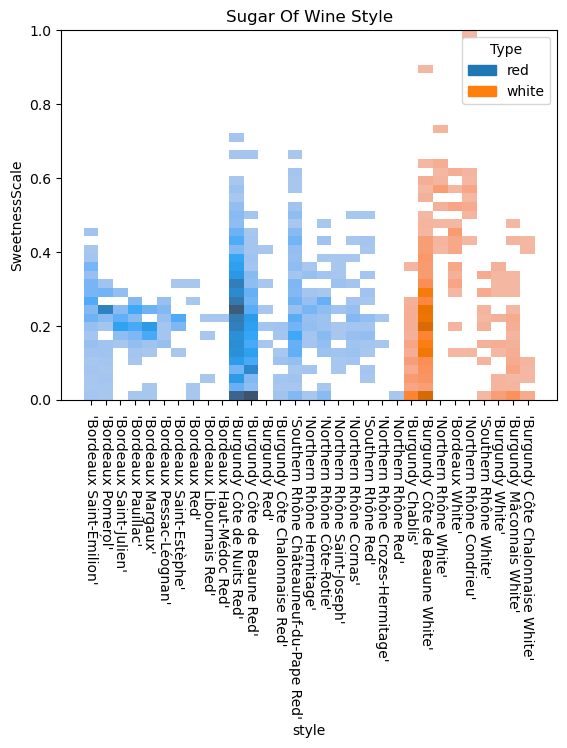

In [55]:
sns.histplot(
    x='style',
    y='SweetnessScale',
    hue='Type',
    data=wines,
)

plt.title("Sugar Of Wine Style")
plt.xticks(rotation=270)
plt.ylim([0,1])

plt.show()

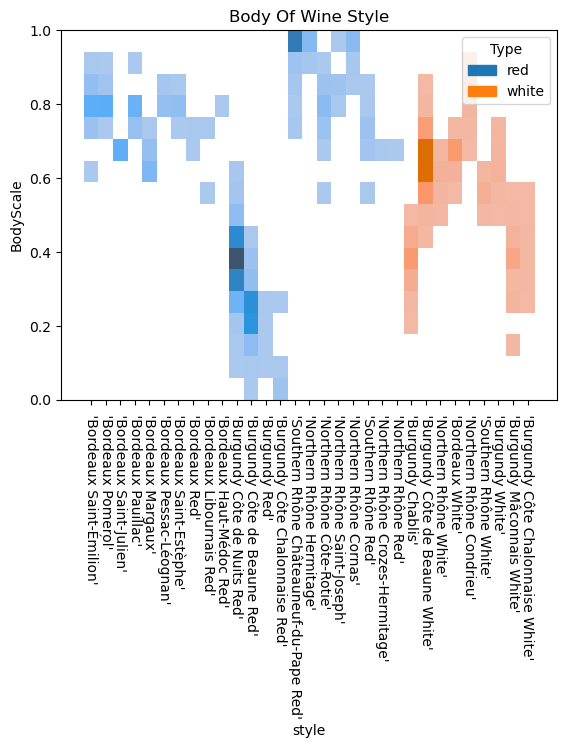

In [56]:
sns.histplot(
    x='style',
    y='BodyScale',
    hue='Type',
    data=wines,
)

plt.title("Body Of Wine Style")
plt.xticks(rotation=270)
plt.ylim([0,1])

plt.show()

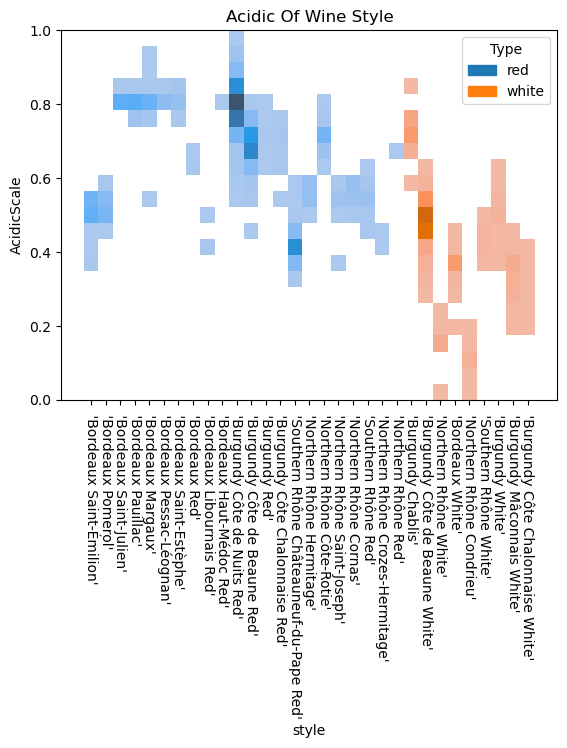

In [57]:
sns.histplot(
    x='style',
    y='AcidicScale',
    hue='Type',
    data=wines,
)

plt.title("Acidic Of Wine Style")
plt.xticks(rotation=270)
plt.ylim([0,1])

plt.show()